In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
422/422 - 7s - 17ms/step - accuracy: 0.9280 - loss: 0.2451 - val_accuracy: 0.9705 - val_loss: 0.0991
Epoch 2/10
422/422 - 7s - 17ms/step - accuracy: 0.9719 - loss: 0.0904 - val_accuracy: 0.9740 - val_loss: 0.0938
Epoch 3/10
422/422 - 9s - 21ms/step - accuracy: 0.9816 - loss: 0.0582 - val_accuracy: 0.9768 - val_loss: 0.0785
Epoch 4/10
422/422 - 6s - 14ms/step - accuracy: 0.9868 - loss: 0.0415 - val_accuracy: 0.9813 - val_loss: 0.0694
Epoch 5/10
422/422 - 5s - 13ms/step - accuracy: 0.9904 - loss: 0.0310 - val_accuracy: 0.9827 - val_loss: 0.0654
Epoch 6/10
422/422 - 6s - 15ms/step - accuracy: 0.9911 - loss: 0.0252 - val_accuracy: 0.9783 - val_loss: 0.0790
Epoch 7/10
422/422 - 5s - 13ms/step - accuracy: 0.9920 - loss: 0.0232 - val_accuracy: 0.9790 - val_loss: 0.0840
Epoch 8/10
422/422 - 6s - 15ms/step - accuracy: 0.9942 - loss: 0.0172 - val_accuracy: 0.9792 - val_loss: 0.0803
Epoch 9/10
422/422 - 5s - 13ms/step - accuracy: 0.9950 - loss: 0.0152 - val_accuracy: 0.9795 - val_loss:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9799 - loss: 0.0861


In [ ]:
print(f"Test accuracy: {test_acc * 100:.2f}%")

Test accuracy: 97.99%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Digit: 7


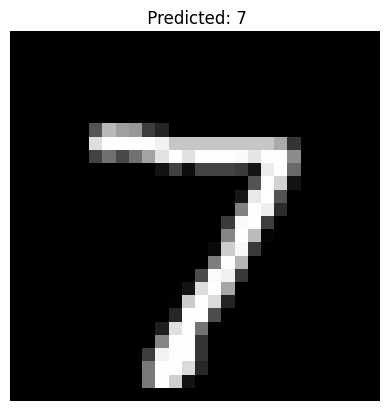

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sample = x_test[0].reshape(1, 28, 28)
prediction = model.predict(sample)
predicted_class = np.argmax(prediction)
print("Predicted Digit:", predicted_class)
print("Actual Digit:", y_test[0])
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f" Predicted: {predicted_class}")
plt.axis('off')
plt.show()